In [1]:
#Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip show scikit-learn

Name: scikit-learnNote: you may need to restart the kernel to use updated packages.
Version: 0.23.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: c:\users\chinmaya\anaconda3\lib\site-packages
Requires: scipy, numpy, threadpoolctl, joblib
Required-by: pmdarima, mlxtend, lightgbm, imbalanced-learn



In [3]:
#Importing the dataset
#prod = pd.read_csv('/content/drive/MyDrive/Deep Learning/Inventry Management/productdetails.csv')
final = pd.read_csv('../final.csv',index_col=0)
final

,year,month_no,week_no,Product_type,Revenue,Promotion_applied,Generic_Holiday,Education_Holiday,no_of_units,updated_week,updated_month,quarter
0,1,1,1,1,39469,5,0,5,83,1,1,1
1,1,1,1,2,32843,5,0,5,18,1,1,1
2,1,1,1,3,51626,5,0,5,24,1,1,1
3,1,1,1,4,66305,5,0,5,504,1,1,1
4,1,1,1,5,30836,5,0,5,33,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
146020,3,34,135,1111,14316,0,1,4,10,3,10,4
146021,3,34,135,1112,29301,0,1,4,30,3,10,4
146022,3,34,135,1113,17305,0,1,4,41,3,10,4
146023,3,34,135,1114,57476,0,1,4,44,3,10,4


In [4]:
final[final.no_of_units==0]

,year,month_no,week_no,Product_type,Revenue,Promotion_applied,Generic_Holiday,Education_Holiday,no_of_units,updated_week,updated_month,quarter
291,1,1,1,292,0,5,0,5,0,1,1,1
875,1,1,1,876,0,5,0,5,0,1,1,1
1406,1,1,2,292,0,0,0,5,0,2,1,1
1990,1,1,2,876,0,0,0,5,0,2,1,1
2521,1,1,3,292,0,5,0,2,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
145012,3,34,135,103,0,0,1,4,0,3,10,4
145248,3,34,135,339,1402,0,1,4,0,3,10,4
145258,3,34,135,349,0,0,1,4,0,3,10,4
145671,3,34,135,762,0,0,1,4,0,3,10,4


In [5]:
final[final.Product_type==292]

,year,month_no,week_no,Product_type,Revenue,Promotion_applied,Generic_Holiday,Education_Holiday,no_of_units,updated_week,updated_month,quarter
291,1,1,1,292,0,5,0,5,0,1,1,1
1406,1,1,2,292,0,0,0,5,0,2,1,1
2521,1,1,3,292,0,5,0,2,0,3,1,1
3636,1,1,4,292,16672,0,0,0,35,4,1,1
4751,1,2,5,292,84644,5,0,0,190,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
140741,3,33,131,292,29124,0,0,0,62,3,9,3
141856,3,33,132,292,35099,5,0,0,77,4,9,3
142971,3,34,133,292,28069,0,0,0,61,1,10,4
144086,3,34,134,292,37823,5,0,0,84,2,10,4


In [6]:
from tqdm import tqdm
for i in tqdm(range(0,len(final))):
    if (final.no_of_units[i]==0):
        final.no_of_units[i] = final.no_of_units[final.Product_type==final.Product_type[i]].median()

100%|███████████████████████████████| 146025/146025 [00:11<00:00, 12833.97it/s]


In [7]:
final

,year,month_no,week_no,Product_type,Revenue,Promotion_applied,Generic_Holiday,Education_Holiday,no_of_units,updated_week,updated_month,quarter
0,1,1,1,1,39469,5,0,5,83,1,1,1
1,1,1,1,2,32843,5,0,5,18,1,1,1
2,1,1,1,3,51626,5,0,5,24,1,1,1
3,1,1,1,4,66305,5,0,5,504,1,1,1
4,1,1,1,5,30836,5,0,5,33,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
146020,3,34,135,1111,14316,0,1,4,10,3,10,4
146021,3,34,135,1112,29301,0,1,4,30,3,10,4
146022,3,34,135,1113,17305,0,1,4,41,3,10,4
146023,3,34,135,1114,57476,0,1,4,44,3,10,4


In [8]:
(1115*135)-146025

4500

In [9]:
#creating weekly dataset
weekly = final.drop(['month_no','week_no','quarter'],axis=1)
weekly

,year,Product_type,Revenue,Promotion_applied,Generic_Holiday,Education_Holiday,no_of_units,updated_week,updated_month
0,1,1,39469,5,0,5,83,1,1
1,1,2,32843,5,0,5,18,1,1
2,1,3,51626,5,0,5,24,1,1
3,1,4,66305,5,0,5,504,1,1
4,1,5,30836,5,0,5,33,1,1
...,...,...,...,...,...,...,...,...,...
146020,3,1111,14316,0,1,4,10,3,10
146021,3,1112,29301,0,1,4,30,3,10
146022,3,1113,17305,0,1,4,41,3,10
146023,3,1114,57476,0,1,4,44,3,10


In [10]:
monthly = final.groupby(['year','updated_month','Product_type']).sum().reset_index()
monthly.drop(['month_no','week_no','quarter','updated_week'],axis=1,inplace=True)
monthly

,year,updated_month,Product_type,Revenue,Promotion_applied,Generic_Holiday,Education_Holiday,no_of_units
0,1,1,1,114747,10,0,5,239
1,1,1,2,116307,10,0,15,61
2,1,1,3,165501,10,0,20,75
3,1,1,4,243853,10,0,12,1852
4,1,1,5,107427,10,0,15,113
...,...,...,...,...,...,...,...,...
36825,3,10,1111,74600,5,1,4,51
36826,3,10,1112,175491,5,1,4,175
36827,3,10,1113,89124,5,1,4,209
36828,3,10,1114,262661,5,1,4,205


In [11]:
quarter = final.groupby(['year','quarter','Product_type']).sum().reset_index()
quarter.drop(['month_no','week_no','updated_week','updated_month'],axis=1,inplace=True)
quarter

,year,quarter,Product_type,Revenue,Promotion_applied,Generic_Holiday,Education_Holiday,no_of_units
0,1,1,1,315247,30,3,5,654
1,1,1,2,347640,30,2,16,189
2,1,1,3,492968,30,3,26,227
3,1,1,4,693969,30,2,14,5265
4,1,1,5,323434,30,3,16,337
...,...,...,...,...,...,...,...,...
13195,3,4,1111,74600,5,1,4,51
13196,3,4,1112,175491,5,1,4,175
13197,3,4,1113,89124,5,1,4,209
13198,3,4,1114,262661,5,1,4,205


In [12]:
weekly

,year,Product_type,Revenue,Promotion_applied,Generic_Holiday,Education_Holiday,no_of_units,updated_week,updated_month
0,1,1,39469,5,0,5,83,1,1
1,1,2,32843,5,0,5,18,1,1
2,1,3,51626,5,0,5,24,1,1
3,1,4,66305,5,0,5,504,1,1
4,1,5,30836,5,0,5,33,1,1
...,...,...,...,...,...,...,...,...,...
146020,3,1111,14316,0,1,4,10,3,10
146021,3,1112,29301,0,1,4,30,3,10
146022,3,1113,17305,0,1,4,41,3,10
146023,3,1114,57476,0,1,4,44,3,10


In [13]:
weekly.groupby('year').describe()

Product_type                                                            \
            count        mean         std  min    25%    50%    75%     max   
year                                                                          
1         50460.0  558.801149  321.942366  1.0  281.0  558.0  838.0  1115.0   
2         52080.0  558.365284  321.906320  1.0  280.0  558.0  837.0  1115.0   
3         43485.0  558.000000  321.876347  1.0  279.0  558.0  837.0  1115.0   

      Revenue                ... updated_week      updated_month            \
        count          mean  ...          75%  max         count      mean   
year                         ...                                             
1     50460.0  41609.440745  ...         3.00  4.0       50460.0  6.266350   
2     52080.0  40329.964785  ...         3.25  4.0       52080.0  6.638249   
3     43485.0  38477.575463  ...         3.00  4.0       43485.0  5.384615   

                                           
           std  min  25%  50%   75%   max  
year                                       
1     3.404759  1.0  3.0  6.0   9.0  12.0  
2     3.395455  1.0  4.0  7.0  10.0  12.0  
3     2.815879  1.0  3.0  5.0   8.0  10.0  

[3 rows x 64 columns]

In [14]:
weekly.groupby('Generic_Holiday').describe()

year                                               \
                    count      mean       std  min  25%  50%  75%  max   
Generic_Holiday                                                          
0                117025.0  1.960017  0.803616  1.0  1.0  2.0  3.0  3.0   
1                 26950.0  1.949499  0.798442  1.0  1.0  2.0  3.0  3.0   
2                  2050.0  1.543902  0.498190  1.0  1.0  2.0  2.0  2.0   

                Product_type              ... updated_week      updated_month  \
                       count        mean  ...          75%  max         count   
Generic_Holiday                           ...                                   
0                   117025.0  558.153326  ...          3.0  4.0      117025.0   
1                    26950.0  559.451911  ...          3.0  4.0       26950.0   
2                     2050.0  559.160000  ...          4.0  4.0        2050.0   

                                                               
                     mean       std  min  25%  50%  75%   max  
Generic_Holiday                                                
0                6.076633  3.404206  1.0  3.0  6.0  9.0  12.0  
1                6.212876  2.721434  2.0  4.0  5.0  8.0  12.0  
2                8.543902  0.498190  8.0  8.0  9.0  9.0   9.0  

[3 rows x 64 columns]

In [15]:
#creating dataframe of product type , year and no. of units
pd.crosstab(index=weekly.Product_type,columns=weekly.year,values=weekly.no_of_units,aggfunc='sum')

year,1,2,3
Product_type,,,
1,2746,2732,2283
2,775,748,584
3,881,858,707
4,21176,20326,15793
5,1389,1359,1077
...,...,...,...
1111,959,1052,822
1112,2512,2732,2611
1113,4489,4393,3332


In [16]:
monthly.Generic_Holiday.value_counts()

0    19909
1     7125
2     5901
3     3457
4      438
Name: Generic_Holiday, dtype: int64

In [17]:
quarter.Generic_Holiday.value_counts()

3    3956
2    3917
4    2319
1    2072
0     936
Name: Generic_Holiday, dtype: int64

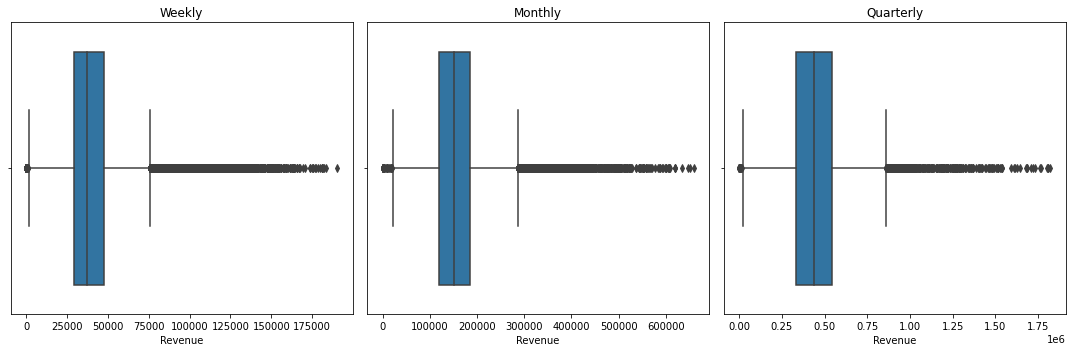

In [18]:
#visualizing Revenue wrt week, month,quarter
fig, axes = plt.subplots(ncols=3,nrows=1,tight_layout=True,figsize=(15,5))
axes[0].set_title('Weekly')
sns.boxplot(weekly.Revenue,ax=axes[0])
axes[1].set_title('Monthly')
sns.boxplot(monthly.Revenue,ax=axes[1])
axes[2].set_title('Quarterly')
sns.boxplot(quarter.Revenue,ax=axes[2])
plt.show()

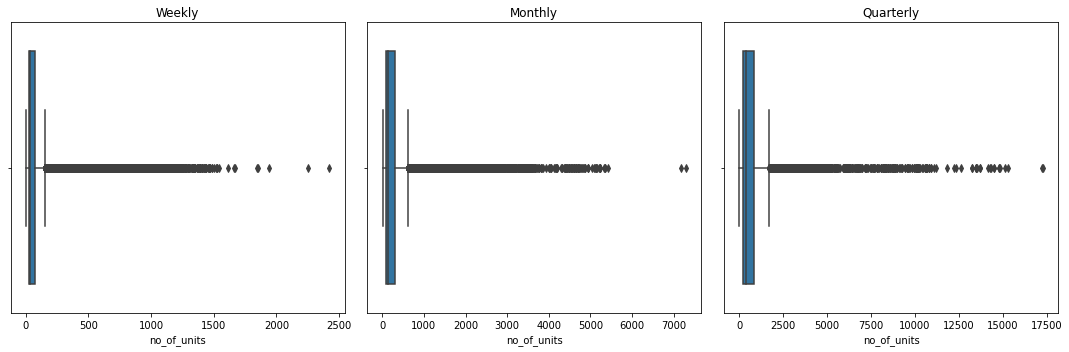

In [19]:
#visualizing no of units wrt week, month,quarter
fig, axes = plt.subplots(ncols=3,nrows=1,tight_layout=True,figsize=(15,5))
axes[0].set_title('Weekly')
sns.boxplot(weekly.no_of_units,ax=axes[0])
axes[1].set_title('Monthly')
sns.boxplot(monthly.no_of_units,ax=axes[1])
axes[2].set_title('Quarterly')
sns.boxplot(quarter.no_of_units,ax=axes[2])
plt.show()

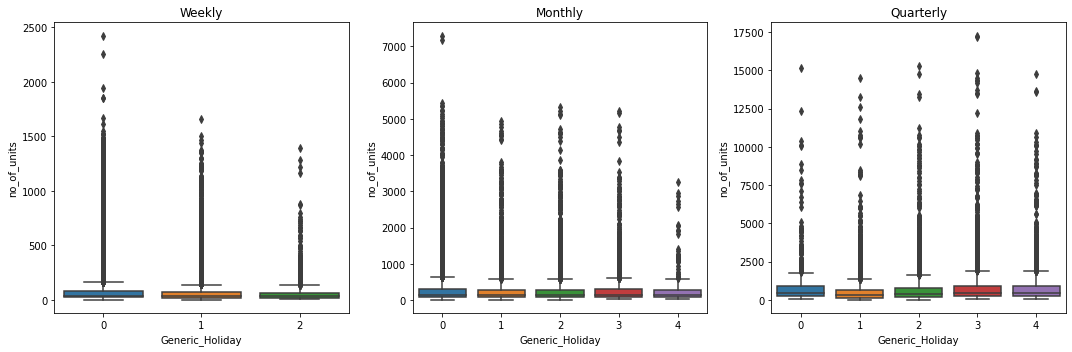

In [20]:
#visualizing Generic holiday wrt week, month,quarter
fig, axes = plt.subplots(ncols=3,nrows=1,tight_layout=True,figsize=(15,5))
axes[0].set_title('Weekly')
sns.boxplot(x=weekly.Generic_Holiday,y=weekly.no_of_units,ax=axes[0])
axes[1].set_title('Monthly')
sns.boxplot(x=monthly.Generic_Holiday,y=monthly.no_of_units,ax=axes[1])
axes[2].set_title('Quarterly')
sns.boxplot(x=quarter.Generic_Holiday,y=quarter.no_of_units,ax=axes[2])
plt.show()

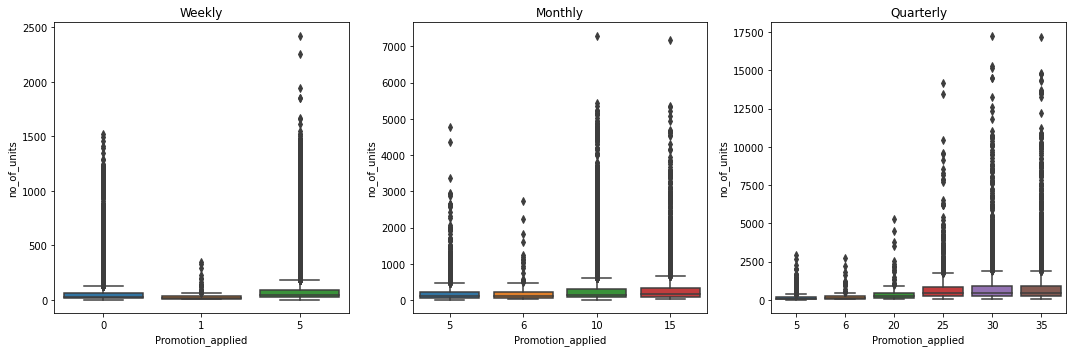

In [21]:
#visualizing Promotion Applied wrt week, month,quarter
fig, axes = plt.subplots(ncols=3,nrows=1,tight_layout=True,figsize=(15,5))
axes[0].set_title('Weekly')
sns.boxplot(x=weekly.Promotion_applied,y=weekly.no_of_units,ax=axes[0])
axes[1].set_title('Monthly')
sns.boxplot(x=monthly.Promotion_applied,y=monthly.no_of_units,ax=axes[1])
axes[2].set_title('Quarterly')
sns.boxplot(x=quarter.Promotion_applied,y=quarter.no_of_units,ax=axes[2])
plt.show()

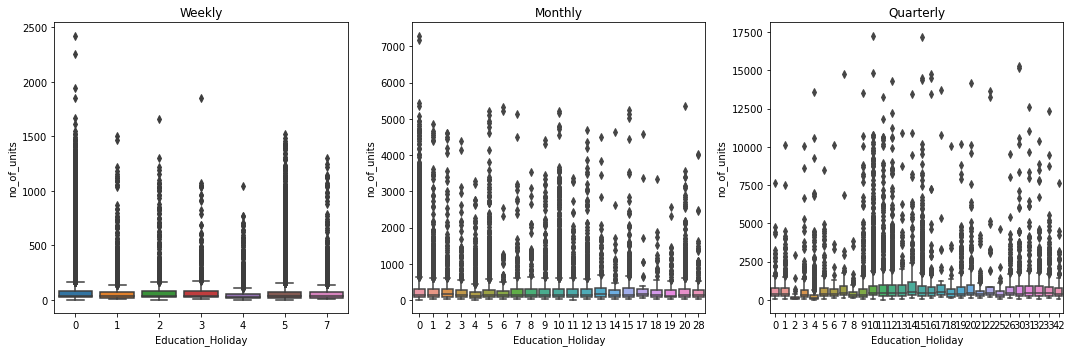

In [22]:
#visualizing no of units wrt week, month,quarter
fig, axes = plt.subplots(ncols=3,nrows=1,tight_layout=True,figsize=(15,5))
axes[0].set_title('Weekly')
sns.boxplot(x=weekly.Education_Holiday,y=weekly.no_of_units,ax=axes[0])
axes[1].set_title('Monthly')
sns.boxplot(x=monthly.Education_Holiday,y=monthly.no_of_units,ax=axes[1])
axes[2].set_title('Quarterly')
sns.boxplot(x=quarter.Education_Holiday,y=quarter.no_of_units,ax=axes[2])
plt.show()

In [23]:
#promotion applied variable in weekly dataset
weekly[['Promotion_applied','Revenue','no_of_units']].groupby('Promotion_applied').describe()

Revenue                                                \
                     count          mean           std     min       25%   
Promotion_applied                                                          
0                  68265.0  33729.456544  13606.873470     0.0  25064.00   
1                    180.0  17061.283333   5702.590806  8112.0  13698.75   
5                  77580.0  45985.846004  16983.205576     0.0  34805.75   

                                               no_of_units             \
                       50%       75%       max       count       mean   
Promotion_applied                                                       
0                  31518.0  39358.00  190357.0     68265.0  61.350297   
1                  15916.0  19578.25   45931.0       180.0  33.688889   
5                  43260.0  53455.25  183230.0     77580.0  84.087046   

                                                              
                          std  min   25%   50%   75%     max  
Promotion_applied                                             
0                   97.302058  1.0  18.0  30.0  63.0  1520.0  
1                   52.092021  4.0  10.0  16.0  31.0   343.0  
5                  127.801757  1.0  26.0  42.0  87.0  2423.0

In [24]:
#promotion applied variable in monthly dataset
monthly[['Promotion_applied','Revenue','no_of_units']].groupby('Promotion_applied').describe()

Revenue                                                   \
                     count           mean           std      min        25%   
Promotion_applied                                                             
5                   2230.0  118798.167265  51922.120514      0.0   83921.50   
6                    180.0  120408.894444  38491.569852  62801.0   94747.00   
10                 28090.0  160143.431684  59375.254491      0.0  121153.75   
15                  6330.0  171907.078199  64530.484582      0.0  129054.00   

                                                 no_of_units              \
                        50%        75%       max       count        mean   
Promotion_applied                                                          
5                  109677.5  144037.25  588033.0      2230.0  217.498655   
6                  112784.5  136932.00  358450.0       180.0  236.700000   
10                 150989.5  185666.75  646111.0     28090.0  292.110253   
15                 161294.0  199962.75  659082.0      6330.0  313.524487   

                                                                  
                          std   min   25%    50%     75%     max  
Promotion_applied                                                 
5                  347.248416   8.0  64.0  108.0  221.00  4760.0  
6                  368.102198  26.0  65.0  116.0  227.25  2724.0  
10                 449.324532  12.0  89.0  145.0  300.00  7296.0  
15                 480.021407  18.0  96.0  157.0  323.00  7166.0

In [25]:
#promotion applied variable in quarter dataset
quarter[['Promotion_applied','Revenue','no_of_units']].groupby('Promotion_applied').describe()

Revenue                                                    \
                    count           mean            std       min       25%   
Promotion_applied                                                             
5                  1115.0   92933.210762   36450.149861       0.0   70201.5   
6                   180.0  120408.894444   38491.569852   62801.0   94747.0   
20                  180.0  243049.494444   78094.831689  138174.0  192581.0   
25                 1115.0  462690.565022  164433.548507  177027.0  356044.5   
30                 4280.0  490976.529206  177727.851289  107199.0  373333.0   
35                 6330.0  487657.464455  178189.380842       0.0  369965.5   

                                                  no_of_units              \
                        50%        75%        max       count        mean   
Promotion_applied                                                           
5                   87577.0  109263.00   353261.0      1115.0  170.168610   
6                  112784.5  136932.00   358450.0       180.0  236.700000   
20                 223500.0  271508.00   713835.0       180.0  479.911111   
25                 438723.0  531445.00  1679468.0      1115.0  844.890583   
30                 462523.5  569173.75  1808762.0      4280.0  894.763551   
35                 461820.5  563568.25  1819495.0      6330.0  888.980411   

                                                                      
                           std   min     25%    50%     75%      max  
Promotion_applied                                                     
5                   263.263779   8.0   50.50   85.0  175.00   2912.0  
6                   368.102198  26.0   65.00  116.0  227.25   2724.0  
20                  740.811893  55.0  129.75  233.0  449.75   5251.0  
25                 1291.924500  80.0  255.50  422.0  858.50  14158.0  
30                 1371.494726  59.0  273.00  446.0  930.00  17271.0  
35                 1360.747888  57.0  272.00  444.0  919.00  17212.0

In [26]:
#Education holiday variable in monthly dataset
monthly[['Education_Holiday','Revenue','no_of_units']].groupby('Education_Holiday').describe()

Revenue                                                   \
                     count           mean           std      min        25%   
Education_Holiday                                                             
0                  16354.0  164709.784395  61493.720897      0.0  124065.25   
1                   2068.0  163259.782882  62768.253719      0.0  123148.50   
2                    737.0  160878.067843  69131.438003  29402.0  115893.00   
3                    565.0  132157.458407  51340.216441  50512.0   91984.00   
4                   1348.0  112283.588279  49645.937981      0.0   77285.75   
5                   3402.0  160819.537625  59511.431043      0.0  121279.50   
6                    318.0  152861.103774  50373.018489      0.0  120447.00   
7                    422.0  157708.246445  56935.759852  58486.0  125354.25   
8                    351.0  150517.170940  45880.078449  72653.0  119001.50   
9                    803.0  142876.703611  48064.566784  62801.0  109258.00   
10                  4497.0  161025.534801  59507.827982      0.0  121298.00   
11                   603.0  140894.966833  57462.132805   9334.0  102874.50   
12                  1746.0  160743.247995  61455.488602  16672.0  121651.50   
13                   337.0  166956.157270  73427.631167  10526.0  122764.00   
14                   134.0  158624.395522  58235.107164  54522.0  125180.75   
15                   789.0  163203.536122  55018.554941  61029.0  126180.00   
17                    50.0  174376.240000  98261.465056  74497.0  116150.50   
18                   176.0  171828.426136  80165.495562  66950.0  116440.00   
19                   224.0  150918.736607  47023.239428  56834.0  121091.00   
20                  1638.0  156581.603175  55191.607456      0.0  117890.25   
28                   268.0  157458.309701  54096.668084  57038.0  125849.50   

                                                 no_of_units              \
                        50%        75%       max       count        mean   
Education_Holiday                                                          
0                  154352.0  191331.00  659082.0     16354.0  300.587991   
1                  153307.0  188643.75  619935.0      2068.0  291.819632   
2                  149776.0  188163.00  646111.0       737.0  324.507463   
3                  124905.0  161863.00  433570.0       565.0  260.702655   
4                  101223.0  135326.00  427571.0      1348.0  208.701780   
5                  151293.5  186777.00  650798.0      3402.0  278.445326   
6                  150006.0  183002.50  358845.0       318.0  256.930818   
7                  150233.5  177712.25  605400.0       422.0  313.784360   
8                  141580.0  180527.00  402029.0       351.0  295.977208   
9                  133907.0  166696.50  495786.0       803.0  311.260274   
10                 151713.0  186302.00  588033.0      4497.0  289.724705   
11                 130289.0  169307.50  497997.0       603.0  275.900498   
12                 152021.0  185542.75  607398.0      1746.0  285.931844   
13                 153140.0  193660.00  588684.0       337.0  319.160237   
14                 149865.5  177997.75  519562.0       134.0  306.604478   
15                 153384.0  187954.00  499408.0       789.0  306.795944   
17                 155213.0  186984.75  551512.0        50.0  399.040000   
18                 156275.5  199908.25  557567.0       176.0  263.602273   
19                 143292.0  172203.00  360612.0       224.0  260.584821   
20                 148663.5  184678.00  516636.0      1638.0  275.152625   
28                 149128.5  179946.50  452244.0       268.0  301.070896   

                                                                    
                          std   min     25%    50%     75%     max  
Education_Holiday                                                   
0                  456.582979  12.0   91.00  150.0  312.75  7296.0  
1                  45

In [27]:
#removing unwanted columns in the dataset
weekly.drop(['year','Revenue','Education_Holiday'],axis=1,inplace=True)
monthly.drop(['year','Revenue','Education_Holiday'],axis=1,inplace=True)
quarter.drop(['year','Revenue','Education_Holiday'],axis=1,inplace=True)

## Building Model for Weekly dataset

<AxesSubplot:>

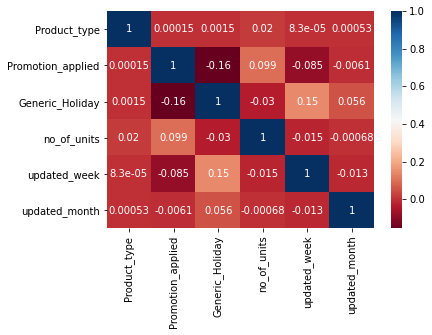

In [28]:
sns.heatmap(weekly.corr(),annot=True,cmap='RdBu')

In [29]:
from tqdm import tqdm
for i in tqdm(range(0,len(weekly))):
    if(weekly.Promotion_applied[i]>0):
        weekly.Promotion_applied[i] = 1
    else:
        weekly.Promotion_applied[i] = 0

100%|████████████████████████████████| 146025/146025 [02:03<00:00, 1181.90it/s]


In [30]:
#promotion applied variable in monthly dataset
weekly[['Promotion_applied','no_of_units']].groupby('Promotion_applied').describe()

no_of_units                                                \
                        count       mean         std  min   25%   50%   75%   
Promotion_applied                                                             
0                     68265.0  61.350297   97.302058  1.0  18.0  30.0  63.0   
1                     77760.0  83.970383  127.701186  1.0  26.0  42.0  87.0   

                           
                      max  
Promotion_applied          
0                  1520.0  
1                  2423.0

In [31]:
#consider weekly dataset
x = weekly.drop('no_of_units',axis=1)
y = weekly.no_of_units

In [32]:
#transforming the output variable
y1 = np.round(np.log(y))

In [33]:
#preprocessing the data i.e., applying min-max scalar
from sklearn.preprocessing import MinMaxScaler

#appling scaling for weekly data
scale_week = MinMaxScaler()
a = scale_week.fit_transform(x)
x1 = pd.DataFrame(a,columns=x.columns)
x1

,Product_type,Promotion_applied,Generic_Holiday,updated_week,updated_month
0,0.000000,1.0,0.0,0.000000,0.000000
1,0.000898,1.0,0.0,0.000000,0.000000
2,0.001795,1.0,0.0,0.000000,0.000000
3,0.002693,1.0,0.0,0.000000,0.000000
4,0.003591,1.0,0.0,0.000000,0.000000
...,...,...,...,...,...
146020,0.996409,0.0,0.5,0.666667,0.818182
146021,0.997307,0.0,0.5,0.666667,0.818182
146022,0.998205,0.0,0.5,0.666667,0.818182
146023,0.999102,0.0,0.5,0.666667,0.818182


In [34]:
#exporting the pickle files
import pickle
file_out = open('scale_week.pkl','wb')
pickle.dump(scale_week,file_out)
file_out.close()

In [34]:
#Splitting into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size=0.2,random_state=2)

print('Shape of Splitting')
print('x_train={}, y_train={}, x_test={},y_test={}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting
x_train=(116820, 5), y_train=(116820,), x_test=(29205, 5),y_test=(29205,)


In [35]:
#Building the linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#initializing the model
lin = LinearRegression()

In [36]:
#fitting and predicting for test data
pred_lin = lin.fit(x_train,y_train).predict(x_test)

#calculating RMSE value
RMSE_lin = np.sqrt(mean_squared_error(y_test,pred_lin))
print(RMSE_lin)

#calculating r2 score
r2_lin = r2_score(y_test,pred_lin)
print('r2 score : ',r2_lin)

0.9878981854314998
r2 score :  0.0335698055003848


In [38]:
#building Random Forest Model
from sklearn.ensemble import RandomForestRegressor

#initializing the model
rand = RandomForestRegressor()

In [39]:
#fitting and predicting for test data
pred_rand = rand.fit(x_train,y_train).predict(x_test)

#calculating RMSE value
RMSE_rand = np.sqrt(mean_squared_error(y_test,pred_rand))
print('RMSE value : ',RMSE_rand)

#calculating r2 score
r2_rand = r2_score(y_test,pred_rand)
print('r2 score : ',r2_rand)

RMSE value :  0.30260877487481685
r2 score :  0.9093204931846973


In [42]:
import pickle
file_out = open('rand_week.pkl','wb')
pickle.dump(rand,file_out)
file_out.close()

In [43]:
#hyper parameter tuning
from sklearn.model_selection import GridSearchCV

In [44]:
rand.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [38]:
#hyper-parameters
params = {'n_estimators': [50,100,150],
          'max_depth': [30,40,50],
          #'min_samples_split' : [2, 5, 10, 15],
          'min_samples_leaf' : [10,15,20]
}

#initializing grid
grid_rand = GridSearchCV(rand,params,verbose=2,n_jobs=-1,cv=3)

#fitting to train data
grid_rand.fit(x_train,y_train)

#fitting and predicting for test data
pred_rand = grid_rand.predict(x_test)

#calculating RMSE value
RMSE_rand = np.sqrt(mean_squared_error(y_test,pred_rand))
print('RMSE value : ',RMSE_rand)

#calculating r2 score
r2_rand = r2_score(y_test,pred_rand)
print('r2 score : ',r2_rand)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 12.6min finished


RMSE value :  0.2741817047854829
r2 score :  0.9255571383065931


In [39]:
print('Best Score :',grid_rand.best_score_)
print('Best Params :',grid_rand.best_params_)

Best Score : 0.9234672372348575
Best Params : {'max_depth': 50, 'min_samples_leaf': 10, 'n_estimators': 100}


In [37]:
#Building the XGBoost model
from xgboost import XGBRegressor

#initializing the model
xgb = XGBRegressor(n_estimators=500)

In [38]:
pred_xgb = xgb.fit(x_train,y_train).predict(x_test)

#calculating RMSE value
RMSE_xgb = np.sqrt(mean_squared_error(y_test,pred_xgb))
print('RMSE value : ',RMSE_xgb)

#calculating r2 score
r2_xgb = r2_score(y_test,pred_xgb)
print('r2 score : ',r2_xgb)

RMSE value :  0.2690991986252341
r2 score :  0.9282914528233901


In [39]:
import pickle
file_out = open('week.pkl','wb')
pickle.dump(xgb,file_out)
file_out.close()

In [48]:
#hyper-parameters
xgb.get_params().keys()

dict_keys(['objective', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [ ]:
#hyper-parameters
params = {'learning_rate': [0.01, 0.1],
        'max_depth': [20,30,40],
        'n_estimators' : [100,200]
    }

#initializing grid
grid_xgb = GridSearchCV(xgb,params,verbose=2,n_jobs=-1,cv=3)

#fitting to train data
grid_xgb.fit(x_train,y_train)

#fitting and predicting for test data
pred_xgb = grid_xgb.predict(x_test)

#calculating RMSE value
RMSE_xgb = np.sqrt(mean_squared_error(y_test,pred_xgb))
print('RMSE value : ',RMSE_xgb)

#calculating r2 score
r2_xgb = r2_score(y_test,pred_xgb)
print('r2 score : ',r2_xgb)

print('Best Score :',grid_xgb.best_score_)
print('Best Params :',grid_xgb.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [43]:
#Building Decision Tree Model
from sklearn.tree import DecisionTreeRegressor

#initializing the model
deci = DecisionTreeRegressor()

In [44]:
#fitting and predicting for test data
pred_deci = deci.fit(x_train,y_train).predict(x_test)

#calculating RMSE value
RMSE_deci = np.sqrt(mean_squared_error(y_test,pred_deci))
print('RMSE value : ',RMSE_deci)

#calculating r2 score
r2_deci = r2_score(y_test,pred_deci)
print('r2 score : ',r2_deci)

RMSE value :  0.3583530908740311
r2 score :  0.8728347573596416


In [45]:
#hyper parameters
deci.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [ ]:
#hyper-parameters
params = {'min_samples_split': [20,30,50],
          'max_depth': [50,100,150],
          'min_samples_leaf': [10,20,30]
    }

#initializing grid
grid_deci = GridSearchCV(deci,params,verbose=2,n_jobs=-1,cv=3)

#fitting to train data
grid_deci.fit(x_train,y_train)

#fitting and predicting for test data
pred_deci = grid_deci.predict(x_test)

#calculating RMSE value
RMSE_deci = np.sqrt(mean_squared_error(y_test,pred_deci))
print('RMSE value : ',RMSE_deci)

#calculating r2 score
r2_deci = r2_score(y_test,pred_deci)
print('r2 score : ',r2_deci)

print('Best Score :',grid_deci.best_score_)
print('Best Params :',grid_deci.best_params_)

In [46]:
#Building KNN model
from sklearn.neighbors import KNeighborsRegressor

#initializing the model
knn = KNeighborsRegressor()

In [47]:
#fitting and predicting for test data
pred_knn = knn.fit(x_train,y_train).predict(x_test)

#calculating RMSE value
RMSE_knn = np.sqrt(mean_squared_error(y_test,pred_knn))
print('RMSE value : ',RMSE_knn)

#calculating r2 score
r2_knn = r2_score(y_test,pred_knn)
print('r2 score : ',r2_knn)

RMSE value :  1.0085774916951005
r2 score :  -0.007313509556341025


In [48]:
#hyper parameters
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [ ]:
#hyper-parameters
params = {'n_neighbors': range(30,50,2)
    }

#initializing grid
grid_knn = GridSearchCV(knn,params,verbose=2,n_jobs=-1,cv=3)

#fitting to train data
grid_knn.fit(x_train,y_train)

#fitting and predicting for test data
pred_knn = grid_knn.predict(x_test)

#calculating RMSE value
RMSE_knn = np.sqrt(mean_squared_error(y_test,pred_knn))
print('RMSE value : ',RMSE_knn)

#calculating r2 score
r2_knn = r2_score(y_test,pred_knn)
print('r2 score : ',r2_knn)

print('Best Score :',grid_knn.best_score_)
print('Best Params :',grid_knn.best_params_)

In [49]:
#consolidating the results
Algorithm = ['Linear Reg','KNN','Decision Tree','Random Forest','XGBoost']
RMSE = [RMSE_lin,RMSE_knn,RMSE_deci,RMSE_rand,RMSE_xgb]
r2_score = [r2_lin,r2_knn,r2_deci,r2_rand,r2_xgb]
weekly_result = pd.DataFrame({'Algorithm':Algorithm,'RMSE':RMSE,'r2_Score':r2_score})
weekly_result = weekly_result.set_index('Algorithm')
weekly_result

,RMSE,r2_Score
Algorithm,,
Linear Reg,0.987898,0.033570
KNN,1.008577,-0.007314
Decision Tree,0.358353,0.872835
Random Forest,0.274182,0.925557
XGBoost,0.512601,0.739802


In [50]:
#exporting the pickle file
import pickle
pickle_out = open('pickle_files/weekly.pkl','wb')
pickle.dump(grid_rand,pickle_out)
pickle_out.close()

In [51]:
#Loading Pickle file
model = pickle.load(open('pickle_files/weekly.pkl','rb'))

#Scaling the input data
i = [1,1,0,1,1]
m = scale_week.transform([i])
m = pd.DataFrame(m,columns=weekly.columns[:-1])

#predicting the output
np.exp(model.predict(m))

array([57.23208154])

In [ ]:
weekly

## Building model for Monthly dataset

<AxesSubplot:>

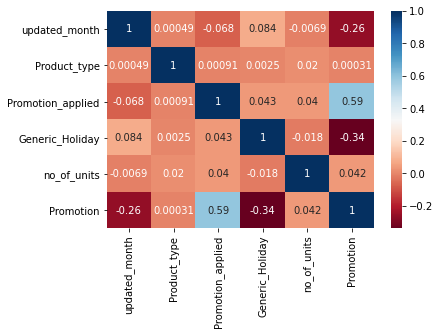

In [57]:
sns.heatmap(monthly.corr(),annot=True,cmap='RdBu')

In [58]:
#promotion applied variable in monthly dataset
monthly[['Promotion_applied','no_of_units']].groupby('Promotion_applied').describe()

no_of_units                                             \
                        count        mean         std   min   25%    50%   
Promotion_applied                                                          
5                      2230.0  217.498655  347.248416   8.0  64.0  108.0   
6                       180.0  236.700000  368.102198  26.0  65.0  116.0   
10                    28090.0  292.110253  449.324532  12.0  89.0  145.0   
15                     6330.0  313.524487  480.021407  18.0  96.0  157.0   

                                   
                      75%     max  
Promotion_applied                  
5                  221.00  4760.0  
6                  227.25  2724.0  
10                 300.00  7296.0  
15                 323.00  7166.0

In [59]:
from tqdm import tqdm
monthly['Promotion'] = 0
for i in tqdm(range(0,len(monthly))):
    if(monthly.Promotion_applied[i]<6):
        monthly['Promotion'][i] = 0
    else:
        monthly['Promotion'][i] = 1

100%|██████████████████████████████████| 36830/36830 [00:24<00:00, 1494.14it/s]


In [60]:
#promotion applied variable in monthly dataset
monthly[['Promotion','no_of_units']].groupby('Promotion').describe()

no_of_units                                                    \
                count        mean         std   min   25%    50%    75%   
Promotion                                                                 
0              2230.0  217.498655  347.248416   8.0  64.0  108.0  221.0   
1             34600.0  295.739682  454.799451  12.0  90.0  147.0  304.0   

                   
              max  
Promotion          
0          4760.0  
1          7296.0

In [61]:
#creating input and output
x = monthly.drop(['no_of_units','Promotion_applied'],axis=1)
y = monthly.no_of_units

#transforming the output variable
y1 = np.round(np.log(y))

#appling scaling for weekly data
scale_month = MinMaxScaler()
a = scale_month.fit_transform(x)
x1 = pd.DataFrame(a,columns=x.columns)
x1

,updated_month,Product_type,Generic_Holiday,Promotion
0,0.000000,0.000000,0.00,1.0
1,0.000000,0.000898,0.00,1.0
2,0.000000,0.001795,0.00,1.0
3,0.000000,0.002693,0.00,1.0
4,0.000000,0.003591,0.00,1.0
...,...,...,...,...
36825,0.818182,0.996409,0.25,0.0
36826,0.818182,0.997307,0.25,0.0
36827,0.818182,0.998205,0.25,0.0
36828,0.818182,0.999102,0.25,0.0


In [63]:
#exporting the pickle files
import pickle
file_out = open('scale_month.pkl','wb')
pickle.dump(scale_month,file_out)
file_out.close()

In [45]:
#Splitting into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size=0.2,random_state=2)

print('Shape of Splitting')
print('x_train={}, y_train={}, x_test={},y_test={}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting
x_train=(29464, 4), y_train=(29464,), x_test=(7366, 4),y_test=(7366,)


In [46]:
#Building the linear Regression Model
from sklearn.metrics import r2_score
#initializing the model
lin = LinearRegression()

#fitting and predicting for test data
pred_lin = lin.fit(x_train,y_train).predict(x_test)

#calculating RMSE value
RMSE_lin = np.sqrt(mean_squared_error(y_test,pred_lin))
print(RMSE_lin)

#calculating r2 score
r2_lin = r2_score(y_test,pred_lin)
print('r2 score : ',r2_lin)

0.9697797320469475
r2 score :  0.009871861456406283


In [47]:
#building Random Forest Model
from sklearn.metrics import r2_score
#initializing the model
rand = RandomForestRegressor()

#fitting and predicting for test data
pred_rand = rand.fit(x_train,y_train).predict(x_test)

#calculating RMSE value
RMSE_rand = np.sqrt(mean_squared_error(y_test,pred_rand))
print('RMSE value : ',RMSE_rand)

#calculating r2 score
r2_rand = r2_score(y_test,pred_rand)
print('r2 score : ',r2_rand)

RMSE value :  0.3812908116356503
r2 score :  0.8469413509381438


In [50]:
from sklearn.model_selection import GridSearchCV

#hyper-parameters
params = {'n_estimators': [150,200,250],
          'max_depth': [50,60,70],
          'min_samples_split' : [2, 5, 10],
          'min_samples_leaf' : [3,5,10]
}

from sklearn.metrics import r2_score

#initializing grid
grid_rand = GridSearchCV(rand,params,verbose=2,n_jobs=-1,cv=3)

#fitting to train data
grid_rand.fit(x_train,y_train)

#fitting and predicting for test data
pred_rand = grid_rand.predict(x_test)

#calculating RMSE value
RMSE_rand = np.sqrt(mean_squared_error(y_test,pred_rand))
print('RMSE value : ',RMSE_rand)

#calculating r2 score
r2_rand = r2_score(y_test,pred_rand)
print('r2 score : ',r2_rand)

print('Best Score :',grid_rand.best_score_)
print('Best Params :',grid_rand.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed: 14.8min finished


RMSE value :  0.34013894560401675
r2 score :  0.8781970186651212
Best Score : 0.8727268050543028
Best Params : {'max_depth': 70, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}


In [46]:
#Building the XGBoost model
from xgboost import XGBRegressor

#initializing the model
xgb = XGBRegressor(learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=450)

#fitting and predicting for test data
pred_xgb = xgb.fit(x_train,y_train).predict(x_test)

#calculating RMSE value
RMSE_xgb = np.sqrt(mean_squared_error(y_test,pred_xgb))
print('RMSE value : ',RMSE_xgb)

#calculating r2 score
r2_xgb = r2_score(y_test,pred_xgb)
print('r2 score : ',r2_xgb)

RMSE value :  0.2910755269583804
r2 score :  0.9108016992471651


In [47]:
import pickle
pickle_out = open('month.pkl','wb')
pickle.dump(xgb,pickle_out)
pickle_out.close()

In [54]:
#hyper-parameters
params = {'learning_rate': [0.01, 0.1],
          'max_depth': [5,10,15],
          'n_estimators' : [450,500,600],
          'min_child_weight': [5,6,7]
    }

#initializing grid
grid_xgb = GridSearchCV(xgb,params,verbose=2,n_jobs=-1,cv=3)

#fitting to train data
grid_xgb.fit(x_train,y_train)

#fitting and predicting for test data
pred_xgb = grid_xgb.predict(x_test)

#calculating RMSE value
RMSE_xgb = np.sqrt(mean_squared_error(y_test,pred_xgb))
print('RMSE value : ',RMSE_xgb)

#calculating r2 score
r2_xgb = r2_score(y_test,pred_xgb)
print('r2 score : ',r2_xgb)

print('Best Score :',grid_xgb.best_score_)
print('Best Params :',grid_xgb.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 11.4min finished


RMSE value :  0.2910755269583804
r2 score :  0.9108016992471651
Best Score : 0.9008352133096382
Best Params : {'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 450}


In [55]:
#Building Decision Tree Model
from sklearn.tree import DecisionTreeRegressor

#initializing the model
deci = DecisionTreeRegressor()

#fitting and predicting for test data
pred_deci = deci.fit(x_train,y_train).predict(x_test)

#calculating RMSE value
RMSE_deci = np.sqrt(mean_squared_error(y_test,pred_deci))
print('RMSE value : ',RMSE_deci)

#calculating r2 score
r2_deci = r2_score(y_test,pred_deci)
print('r2 score : ',r2_deci)

RMSE value :  0.46087536286891767
r2 score :  0.7763792079329785


In [64]:
#hyper-parameters
params = {'min_samples_split': [20,30,50],
          'max_depth': [50,100,150],
          'min_samples_leaf': [10,20,30]
    }

#initializing grid
grid_deci = GridSearchCV(deci,params,verbose=2,n_jobs=-1,cv=3)

#fitting to train data
grid_deci.fit(x_train,y_train)

#fitting and predicting for test data
pred_deci = grid_deci.predict(x_test)

#calculating RMSE value
RMSE_deci = np.sqrt(mean_squared_error(y_test,pred_deci))
print('RMSE value : ',RMSE_deci)

#calculating r2 score
r2_deci = r2_score(y_test,pred_deci)
print('r2 score : ',r2_deci)

print('Best Score :',grid_deci.best_score_)
print('Best Params :',grid_deci.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.9s


RMSE value :  0.3518222100377702
r2 score :  0.869685812351259
Best Score : 0.8565826833589497
Best Params : {'max_depth': 150, 'min_samples_leaf': 10, 'min_samples_split': 20}


[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    7.9s finished


In [56]:
#Building KNN model
from sklearn.neighbors import KNeighborsRegressor

#initializing the model
knn = KNeighborsRegressor()

#fitting and predicting for test data
pred_knn = knn.fit(x_train,y_train).predict(x_test)

#calculating RMSE value
RMSE_knn = np.sqrt(mean_squared_error(y_test,pred_knn))
print('RMSE value : ',RMSE_knn)

#calculating r2 score
r2_knn = r2_score(y_test,pred_knn)
print('r2 score : ',r2_knn)

RMSE value :  0.9860030472729812
r2 score :  -0.023532672798106002


In [66]:
#hyper-parameters
params = {'n_neighbors': range(30,50,2)
    }

#initializing grid
grid_knn = GridSearchCV(knn,params,verbose=2,n_jobs=-1,cv=3)

#fitting to train data
grid_knn.fit(x_train,y_train)

#fitting and predicting for test data
pred_knn = grid_knn.predict(x_test)

#calculating RMSE value
RMSE_knn = np.sqrt(mean_squared_error(y_test,pred_knn))
print('RMSE value : ',RMSE_knn)

#calculating r2 score
r2_knn = r2_score(y_test,pred_knn)
print('r2 score : ',r2_knn)

print('Best Score :',grid_knn.best_score_)
print('Best Params :',grid_knn.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   10.9s finished


RMSE value :  0.9732585250908365
r2 score :  0.002755546828339561
Best Score : 0.00024093778836705346
Best Params : {'n_neighbors': 48}


In [57]:
#consolidating the results
Algorithm = ['Linear Reg','KNN','Decision Tree','Random Forest','XGBoost']
RMSE = [RMSE_lin,RMSE_knn,RMSE_deci,RMSE_rand,RMSE_xgb]
r2_score = [r2_lin,r2_knn,r2_deci,r2_rand,r2_xgb]
monthly_result = pd.DataFrame({'Algorithm':Algorithm,'RMSE':RMSE,'r2_Score':r2_score})
monthly_result = monthly_result.set_index('Algorithm')
monthly_result

,RMSE,r2_Score
Algorithm,,
Linear Reg,0.969780,0.009872
KNN,0.986003,-0.023533
Decision Tree,0.460875,0.776379
Random Forest,0.340139,0.878197
XGBoost,0.291076,0.910802


In [58]:
#exporting the pickle file
import pickle
pickle_out = open('pickle_files/monthly.pkl','wb')
pickle.dump(grid_xgb,pickle_out)
pickle_out.close()

In [69]:
#Loading Pickle file
model = pickle.load(open('pickle_files/monthly.pkl','rb'))

#Scaling the input data
m = scale_month.transform([[1,1110,0,1]])
m = pd.DataFrame(m,columns=['updated_month', 'Product_type', 'Generic_Holiday','Promotion'])

#predicting the output
np.exp(model.predict(m))

array([55.217323], dtype=float32)

In [70]:
monthly

,updated_month,Product_type,Promotion_applied,Generic_Holiday,no_of_units,Promotion
0,1,1,10,0,239,1
1,1,2,10,0,61,1
2,1,3,10,0,75,1
3,1,4,10,0,1852,1
4,1,5,10,0,113,1
...,...,...,...,...,...,...
36825,10,1111,5,1,51,0
36826,10,1112,5,1,175,0
36827,10,1113,5,1,209,0
36828,10,1114,5,1,205,0


## Building Model for Quarter dataset

<AxesSubplot:>

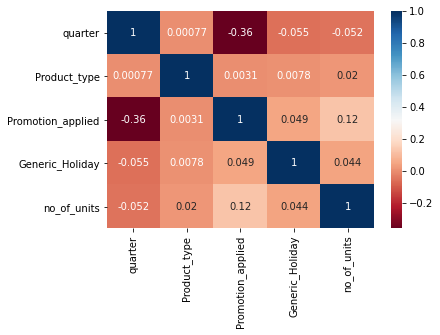

In [64]:
sns.heatmap(quarter.corr(),annot=True,cmap='RdBu')

In [65]:
#promotion applied variable in quarter dataset
quarter[['Promotion_applied','no_of_units']].groupby('Promotion_applied').describe()

no_of_units                                               \
                        count        mean          std   min    25%    50%   
Promotion_applied                                                            
0                      2590.0  486.788031   947.658615   8.0   86.0  213.0   
1                     10610.0  891.313289  1365.031683  57.0  272.0  445.0   

                                    
                      75%      max  
Promotion_applied                   
0                  460.75  14158.0  
1                  922.75  17271.0

In [66]:
from tqdm import tqdm
for i in tqdm(range(0,len(quarter))):
    if(quarter.Promotion_applied[i]<=25):
        quarter['Promotion_applied'][i] = 0
    else:
        quarter['Promotion_applied'][i] = 1

100%|██████████████████████████████████| 13200/13200 [00:08<00:00, 1485.33it/s]


In [67]:
from sklearn.preprocessing import MinMaxScaler
#creating input and output
x = quarter.drop('no_of_units',axis=1)
y = quarter.no_of_units

#transforming the output variable
y1 = np.round(np.log(y))

#appling scaling for weekly data
scale_quarter = MinMaxScaler()
a = scale_quarter.fit_transform(x)
x1 = pd.DataFrame(a,columns=x.columns)
x1

,quarter,Product_type,Promotion_applied,Generic_Holiday
0,0.0,0.000000,0.0,0.75
1,0.0,0.000898,0.0,0.50
2,0.0,0.001795,0.0,0.75
3,0.0,0.002693,0.0,0.50
4,0.0,0.003591,0.0,0.75
...,...,...,...,...
13195,1.0,0.996409,0.0,0.25
13196,1.0,0.997307,0.0,0.25
13197,1.0,0.998205,0.0,0.25
13198,1.0,0.999102,0.0,0.25


In [52]:
#exporting the pickle files
import pickle
file_out = open('scale_quarter.pkl','wb')
pickle.dump(scale_quarter,file_out)
file_out.close()

In [53]:
#Splitting into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size=0.2,random_state=2)

print('Shape of Splitting')
print('x_train={}, y_train={}, x_test={},y_test={}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting
x_train=(10560, 4), y_train=(10560,), x_test=(2640, 4),y_test=(2640,)


In [54]:
#Building the linear Regression Model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
#initializing the model
lin = LinearRegression()

#fitting and predicting for test data
pred_lin = lin.fit(x_train,y_train).predict(x_test)

#calculating RMSE value
RMSE_lin = np.sqrt(mean_squared_error(y_test,pred_lin))
print(RMSE_lin)

#calculating r2 score
r2_lin = r2_score(y_test,pred_lin)
print('r2 score : ',r2_lin)

0.9924562979819411
r2 score :  0.1223959621208186


In [66]:
#building Random Forest Model
from sklearn.ensemble import RandomForestRegressor
#initializing the model
rand = RandomForestRegressor()

#fitting and predicting for test data
pred_rand = rand.fit(x_train,y_train).predict(x_test)

#calculating RMSE value
RMSE_rand = np.sqrt(mean_squared_error(y_test,pred_rand))
print('RMSE value : ',RMSE_rand)

#calculating r2 score
r2_rand = r2_score(y_test,pred_rand)
print('r2 score : ',r2_rand)

RMSE value :  0.5795719871874039
r2 score :  0.7007111060797306


In [69]:
#hyper-parameters
params = {'n_estimators': [250,300,350],
          'max_depth': [60,70,80],
          'min_samples_split' : [3,4,5,6],
          }

from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

#initializing grid
grid_rand = GridSearchCV(rand,params,verbose=2,n_jobs=-1,cv=3)

#fitting to train data
grid_rand.fit(x_train,y_train)

#fitting and predicting for test data
pred_rand = grid_rand.predict(x_test)

#calculating RMSE value
RMSE_rand = np.sqrt(mean_squared_error(y_test,pred_rand))
print('RMSE value : ',RMSE_rand)

#calculating r2 score
r2_rand = r2_score(y_test,pred_rand)
print('r2 score : ',r2_rand)

print('Best Score :',grid_rand.best_score_)
print('Best Params :',grid_rand.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  3.5min finished


RMSE value :  0.5597361199764147
r2 score :  0.7208468745443809
Best Score : 0.6940802183505864
Best Params : {'max_depth': 70, 'min_samples_split': 4, 'n_estimators': 250}


In [55]:
#Building the XGBoost model
from xgboost import XGBRegressor
#initializing the model
xgb = XGBRegressor(learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=850)

#fitting and predicting for test data
pred_xgb = xgb.fit(x_train,y_train).predict(x_test)

#calculating RMSE value
RMSE_xgb = np.sqrt(mean_squared_error(y_test,pred_xgb))
print('RMSE value : ',RMSE_xgb)

#calculating r2 score
r2_xgb = r2_score(y_test,pred_xgb)
print('r2 score : ',r2_xgb)

RMSE value :  0.31615367772859165
r2 score :  0.9109421297523651


In [56]:
#exporting the pickle file
import pickle
pickle_out = open('quarter.pkl','wb')
pickle.dump(xgb,pickle_out)
pickle_out.close()

In [72]:
#hyper-parameters
params = {'learning_rate': [0.01, 0.1],
        'max_depth': [10,12,14],
        'n_estimators' : [750,800,850],
          'min_child_weight': [4,5,6]
    }

#initializing grid
grid_xgb = GridSearchCV(xgb,params,verbose=2,n_jobs=-1,cv=3)

#fitting to train data
grid_xgb.fit(x_train,y_train)

#fitting and predicting for test data
pred_xgb = grid_xgb.predict(x_test)

#calculating RMSE value
RMSE_xgb = np.sqrt(mean_squared_error(y_test,pred_xgb))
print('RMSE value : ',RMSE_xgb)

#calculating r2 score
r2_xgb = r2_score(y_test,pred_xgb)
print('r2 score : ',r2_xgb)

print('Best Score :',grid_xgb.best_score_)
print('Best Params :',grid_xgb.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  9.0min finished


RMSE value :  0.31615367772859165
r2 score :  0.9109421297523651
Best Score : 0.8869466505290756
Best Params : {'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 4, 'n_estimators': 850}


In [73]:
#Building Decision Tree Model
#initializing the model
deci = DecisionTreeRegressor()

#fitting and predicting for test data
pred_deci = deci.fit(x_train,y_train).predict(x_test)

#calculating RMSE value
RMSE_deci = np.sqrt(mean_squared_error(y_test,pred_deci))
print('RMSE value : ',RMSE_deci)

#calculating r2 score
r2_deci = r2_score(y_test,pred_deci)
print('r2 score : ',r2_deci)

RMSE value :  0.6868626522313636
r2 score :  0.5796455651668777


In [83]:
#hyper-parameters
params = {'min_samples_split': [20,30,50],
          'max_depth': [50,100,150],
          'min_samples_leaf': [10,20,30]
    }

#initializing grid
grid_deci = GridSearchCV(deci,params,verbose=2,n_jobs=-1,cv=3)

#fitting to train data
grid_deci.fit(x_train,y_train)

#fitting and predicting for test data
pred_deci = grid_deci.predict(x_test)

#calculating RMSE value
RMSE_deci = np.sqrt(mean_squared_error(y_test,pred_deci))
print('RMSE value : ',RMSE_deci)

#calculating r2 score
r2_deci = r2_score(y_test,pred_deci)
print('r2 score : ',r2_deci)

print('Best Score :',grid_deci.best_score_)
print('Best Params :',grid_deci.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.0s


RMSE value :  0.716940167832718
r2 score :  0.5420251226302515
Best Score : 0.45587858529012526
Best Params : {'max_depth': 50, 'min_samples_leaf': 10, 'min_samples_split': 20}


[Parallel(n_jobs=-1)]: Done  74 out of  81 | elapsed:    2.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    2.4s finished


In [74]:
#Building KNN model
#initializing the model
knn = KNeighborsRegressor()

#fitting and predicting for test data
pred_knn = knn.fit(x_train,y_train).predict(x_test)

#calculating RMSE value
RMSE_knn = np.sqrt(mean_squared_error(y_test,pred_knn))
print('RMSE value : ',RMSE_knn)

#calculating r2 score
r2_knn = r2_score(y_test,pred_knn)
print('r2 score : ',r2_knn)

RMSE value :  1.0076976458514455
r2 score :  0.09523390694449285


In [85]:
#hyper-parameters
params = {'n_neighbors': range(30,50,2)
    }

#initializing grid
grid_knn = GridSearchCV(knn,params,verbose=2,n_jobs=-1,cv=3)

#fitting to train data
grid_knn.fit(x_train,y_train)

#fitting and predicting for test data
pred_knn = grid_knn.predict(x_test)

#calculating RMSE value
RMSE_knn = np.sqrt(mean_squared_error(y_test,pred_knn))
print('RMSE value : ',RMSE_knn)

#calculating r2 score
r2_knn = r2_score(y_test,pred_knn)
print('r2 score : ',r2_knn)

print('Best Score :',grid_knn.best_score_)
print('Best Params :',grid_knn.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.7s finished


RMSE value :  0.9403601327925056
r2 score :  0.212112435444881
Best Score : 0.1911593897231766
Best Params : {'n_neighbors': 48}


In [75]:
#consolidating the results
Algorithm = ['Linear Reg','KNN','Decision Tree','Random Forest','XGBoost']
RMSE = [RMSE_lin,RMSE_knn,RMSE_deci,RMSE_rand,RMSE_xgb]
r2_score = [r2_lin,r2_knn,r2_deci,r2_rand,r2_xgb]
quarter_result = pd.DataFrame({'Algorithm':Algorithm,'RMSE':RMSE,'r2_Score':r2_score})
quarter_result = quarter_result.set_index('Algorithm')
quarter_result

,RMSE,r2_Score
Algorithm,,
Linear Reg,0.992456,0.122396
KNN,1.007698,0.095234
Decision Tree,0.686863,0.579646
Random Forest,0.559736,0.720847
XGBoost,0.316154,0.910942


In [76]:
#exporting the pickle file
import pickle
pickle_out = open('pickle_files/quarter.pkl','wb')
pickle.dump(grid_xgb,pickle_out)
pickle_out.close()

In [77]:
#Loading Pickle file
model = pickle.load(open('pickle_files/quarter.pkl','rb'))

#Scaling the input data
m = scale_quarter.transform([[1,5,1,1]])
m = pd.DataFrame(m,columns=quarter.columns[:-1])

#predicting the output
np.exp(model.predict(m))

array([344.73492], dtype=float32)

In [ ]:
quarter.columns

In [ ]:
all = pd.DataFrame(columns=['quarter', 'Product_type', 'Promotion_applied', 'Generic_Holiday'])
all.Product_type = range(1,1116,1); all.Promotion_applied = 0 ; all.quarter = 1; all.Generic_Holiday = 0
all = pd.DataFrame(scale_quarter.transform(all),columns=all.columns)
np.exp(model.predict(all))